In [12]:
from bs4 import BeautifulSoup as bs
from requests import get
import osmnx as ox
import pandas as pd
import geopandas as gpd
import contextily as cx
from matplotlib import pyplot as plt

In [2]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_metropolitan_areas_in_the_European_Union_by_GDP"

In [3]:
wiki_soup = bs(get(wiki_url).content)

In [4]:
table = wiki_soup.find(
            "table", {"class": "wikitable sortable"}
        )

In [5]:
spans = table.findChildren("span", {"class": "flagicon"}, recursive=True)
metro_names = []
gmp = []
for span in spans:
    a = span.parent.find_all("a")
    for anchor in a: 
        if anchor.text:
            metro_names.append(anchor.parent.text.strip())
            gmp.append(float(span.parent.findNext('td').text))

In [6]:
df = pd.DataFrame({"Metropolitan Area": metro_names, "Gross Metropolitan Product": gmp}).drop_duplicates().reset_index(drop=True)

In [7]:
df

,Metropolitan Area,Gross Metropolitan Product
0,"Paris metropolitan area, France",725.0
1,"Madrid Metropolitan Area, Spain",231.1
2,"Milan metropolitan area, Italy",213.8
3,"Munich Metropolitan Region, Germany",194.9
4,"Berlin Metropolitan Region, Germany",193.3
5,"Amsterdam metropolitan area, Netherlands",182.7
6,"Barcelona metropolitan area, Spain",171.4
7,"Ruhr Area, Germany",168.4
8,"Rome metropolitan area, Italy",165.3
9,"Hamburg Metropolitan Region, Germany",162.7


In [18]:
gdf_greater = gpd.read_file("https://gisco-services.ec.europa.eu/distribution/v2/urau/geojson/URAU_RG_100K_2020_3857_GREATER_CITIES.geojson")
gdf_cities = gpd.read_file("https://gisco-services.ec.europa.eu/distribution/v2/urau/geojson/URAU_RG_100K_2020_3857_CITIES.geojson")
gdf_fua = gpd.read_file("https://gisco-services.ec.europa.eu/distribution/v2/urau/geojson/URAU_RG_100K_2020_3857_FUA.geojson")

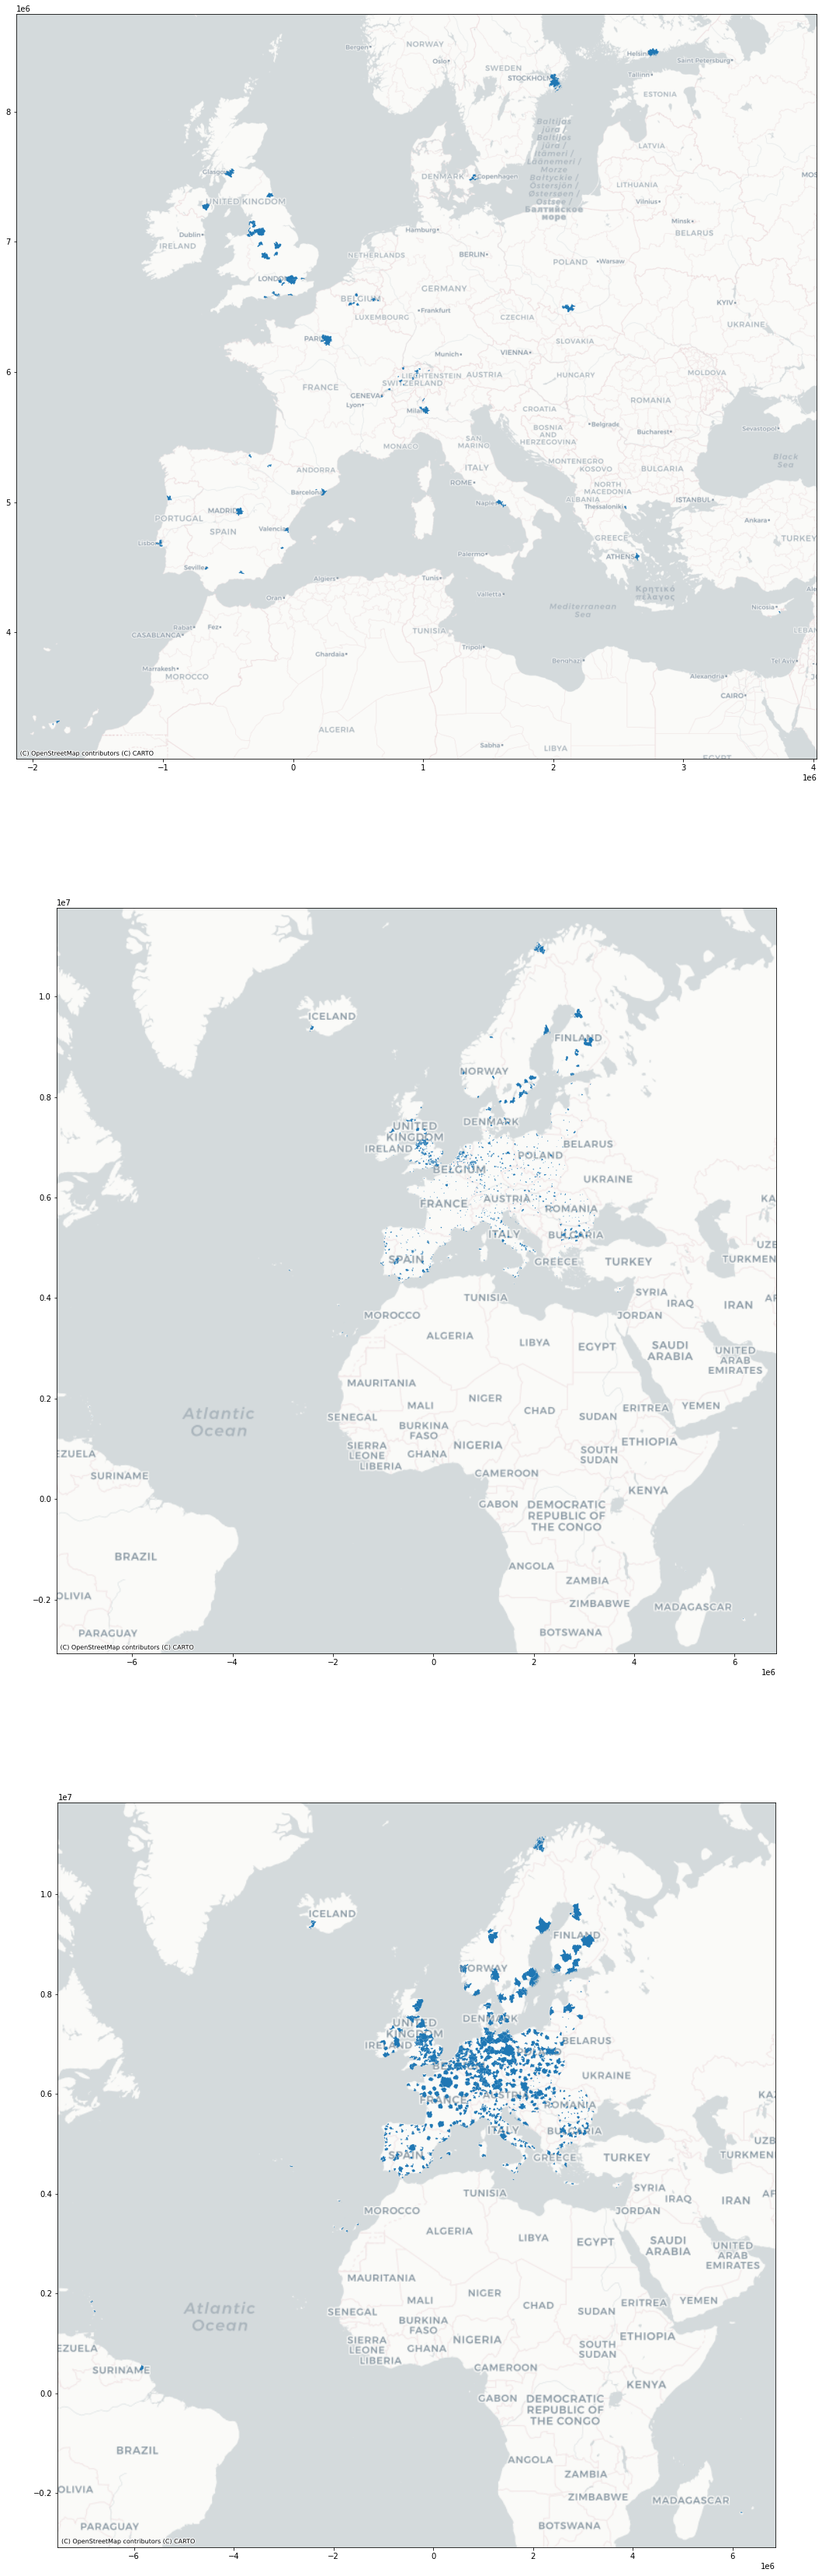

In [21]:
gdfs = [gdf_greater, gdf_cities, gdf_fua]
fig, axs = plt.subplots(3,1, figsize=(20,60))

for i, gdf in enumerate(gdfs):
    ax = axs.flatten()[i]
    gdf.plot(ax=ax)
    cx.add_basemap(ax=ax, crs=gdf.crs, source=cx.providers.CartoDB.Positron)

In [30]:
gdfs = [gdf_greater, gdf_cities, gdf_fua]
fig, axs = plt.subplots(3,1, figsize=(20,60))

for i, gdf in enumerate(gdfs):
    ax = axs.flatten()[i]
    gdf.plot(ax=ax)
    cx.add_basemap(ax=ax, crs=gdf.crs, source=cx.providers.CartoDB.Positron)

,id,URAU_CODE,URAU_CATG,CNTR_CODE,URAU_NAME,CITY_CPTL,CITY_KERN,FUA_CODE,NUTS3_2016,AREA_SQM,NUTS3_2021,FID,geometry
0,BG014C1,BG014C1,C,BG,Haskovo,None,None,BG014L1,BG422,7.396745e+08,BG422,BG014C1,"POLYGON ((2834283.347 5159853.575, 2834513.834..."
1,BG015C1,BG015C1,C,BG,Pazardzhik,None,None,BG015L1,BG423,6.368391e+08,BG423,BG015C1,"POLYGON ((2720298.979 5215491.626, 2720484.660..."
2,BG016C1,BG016C1,C,BG,Blagoevgrad,None,None,BG016L1,BG413,6.200704e+08,BG413,BG016C1,"POLYGON ((2549257.416 5170773.214, 2549443.487..."
3,AT001C1,AT001C1,C,AT,Wien,Y,None,AT001L4,AT130,4.134671e+08,AT130,AT001C1,"POLYGON ((1828152.464 6160550.136, 1828391.745..."
4,AT002C1,AT002C1,C,AT,Graz,None,None,AT002L4,AT221,1.286741e+08,AT221,AT002C1,"POLYGON ((1714806.903 5963906.522, 1715133.514..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,NO005C1,NO005C1,C,NO,Kristiansand,None,None,NO005L1,NO042,2.741873e+08,NO092,NO005C1,"MULTIPOLYGON (((911166.953 7997405.215, 911159..."
932,NO006C1,NO006C1,C,NO,Tromsø,None,None,NO006L1,NO072,2.515170e+09,NO074,NO006C1,"MULTIPOLYGON (((2191470.394 11009248.646, 2191..."
933,NO002C1,NO002C1,C,NO,Bergen,None,None,NO002L1,NO051,4.646704e+08,NO0A2,NO002C1,"MULTIPOLYGON (((590000.760 8517924.477, 590308..."
934,NO001C1,NO001C1,C,NO,Oslo,Y,None,NO001L1,NO011,4.539768e+08,NO081,NO001C1,"MULTIPOLYGON (((1198525.305 8362120.915, 11985..."


In [33]:
gdf_cities.sort_values(by="AREA_SQM")

,id,URAU_CODE,URAU_CATG,CNTR_CODE,URAU_NAME,CITY_CPTL,CITY_KERN,FUA_CODE,NUTS3_2016,AREA_SQM,NUTS3_2021,FID,geometry
332,ES554C1,ES554C1,C,ES,Mislata,None,ES003K1,ES003L3,ES523,2.034393e+06,ES523,ES554C1,"POLYGON ((-46549.191 4789061.561, -46638.692 4..."
856,UK101C1,UK101C1,C,UK,City of London,None,UK001K2,UK001L3,UKI31,2.903130e+06,UKI31,UK101C1,"POLYGON ((-12413.348 6712142.275, -12412.569 6..."
345,ES557C1,ES557C1,C,ES,Esplugues de Llobregat,None,ES002K2,ES002L2,ES511,4.555814e+06,ES511,ES557C1,"POLYGON ((233541.334 5070594.850, 233742.322 5..."
316,ES066C1,ES066C1,C,ES,Cornellà de Llobregat,None,ES002K2,ES002L2,ES511,6.802402e+06,ES511,ES066C1,"POLYGON ((232269.954 5066550.593, 232406.042 5..."
226,ES526C1,ES526C1,C,ES,Santa Coloma de Gramenet,None,ES002K2,ES002L2,ES511,7.099473e+06,ES511,ES526C1,"POLYGON ((246176.597 5082080.824, 247321.630 5..."
344,ES556C1,ES556C1,C,ES,Santurtzi,None,ES019K2,ES019L3,ES213,7.138667e+06,ES213,ES556C1,"POLYGON ((-336401.880 5361835.690, -336670.939..."
330,ES552C1,ES552C1,C,ES,Igualada,None,ES552K1,ES552L1,ES511,8.210901e+06,ES511,ES552C1,"POLYGON ((182145.682 5097869.544, 182136.776 5..."
328,ES550C1,ES550C1,C,ES,Puerto de la Cruz,None,ES550K1,ES550L1,ES709,8.867282e+06,ES709,ES550C1,"POLYGON ((-1843165.344 3298434.829, -1843299.7..."
305,ES060C1,ES060C1,C,ES,Fuengirola,None,None,ES533L1,ES617,1.039761e+07,ES617,ES060C1,"POLYGON ((-511579.462 4381776.857, -511403.021..."
339,ES075C1,ES075C1,C,ES,Mollet del Vallès,None,None,ES002L2,ES511,1.079977e+07,ES511,ES075C1,"POLYGON ((243522.574 5096189.320, 243846.847 5..."
